# #2             
- ## 練習迴圈與矩陣的運算
- ## 練習散佈圖的繪製
- ## 練習指令的 Broadcasting
- ## 練習將矩陣儲存到 EXCEL 檔案（含列與欄標題）。
- ## 以下共三題

# 1. 繪製下圖（線條顏色、符號與數量都可以由程式輕易變更）

## 注意事項：
- ### 將數量的決定放在 code 第一條，譬如，n = 5
- ### 將符號的決定放在 code 第二條，譬如，marker = 's'
- ### 上述方式可以迅速變更設定，看到結果。

<img src="array_proc_demo.jpg" alt="Getting started" width="400"/> 

(-23.1, 23.1, -23.1, 23.1)

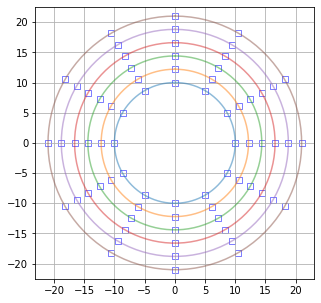

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath

n = 6
marker = 's'
n_marker = 12
x = np.linspace(0, 2*np.pi, 100)
r1, r2 = 10, 20
r = np.linspace(r1, r2+1, n)
ang = 2*np.pi/n_marker


fig = plt.figure(figsize=[5, 5])

for i in range(n):
    a = r[i]*np.sin(x)
    b = r[i]*np.cos(x)
    plt.plot(a, b, alpha=0.5)

for i in range(n_marker):
    for j in range(n):
        c = r[j]*np.sin(i*ang)
        d = r[j]*np.cos(i*ang)
        plt.scatter(c, d, alpha=0.5, marker=marker,
                    edgecolors='b', facecolors='none')

ax = plt.gca()
ax.set_xticks([-20, -15, -10, -5, 0, 5, 10, 15, 20])
ax.set_yticks([-20, -15, -10, -5, 0, 5, 10, 15, 20])
plt.grid(True)
plt.axis('equal')


# 2. 繪製下圖（線條顏色與數量都可以由程式輕易決定）
## 注意事項：
- ### 將方框數量的決定放在 code 第一條，譬如，n = 8，改變 n 值，便能看到結果的改變，譬如，n = 128 得到右圖。

<img src="Loop_proj.png" alt="Getting started" width="400"/> <img src="Loop_proj_2.png" alt="Getting started" width="400"/> 

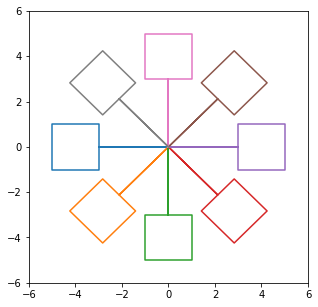

In [71]:
n = 8
ang = 0
fig = plt.figure(figsize=[5, 5])
length = 3

x = np.array([[0, -3, -3, -5, -5, -3, -3, 0]])
y = np.array([[0, 0, 1, 1, -1, -1, 0, 0]])
a = np.concatenate((x, y), axis=0)

for i in range(n):
    b = np.array([[np.cos(ang), -np.sin(ang)], [np.sin(ang), np.cos(ang)]])
    plt.plot(b.dot(a)[0], b.dot(a)[1])
    ang += 2*np.pi/n  # 一個圓2pi,除以n等分(三角函數以輻射單位設定角度)

ax = plt.gca()
ax.set_xticks([-6, -4, -2, 0, 2, 4, 6])
ax.set_yticks([-6, -4, -2, 0, 2, 4, 6])
plt.show()


# 3. 計算如下左圖的卡方右尾面積與自由度對照表，並輸出到 EXCEL 檔，檔名為：Chi2Table.xlsx，含欄與列的名稱，如下右圖。
<img src="Chi2Table.jpg" alt="Getting started" width="400"/> <img src="save_to_excel.png" alt="Getting started" width="400"/> 

## 作法一

In [1]:
import pandas as pd
from scipy.stats import chi2
import numpy as np

n = 29
F = np.array([0.005, 0.01, 0.025, 0.05, 0.1, 0.9, 0.95, 0.975, 0.99, 0.995])
df = range(1, n+1)
index = [n for n in range(1, n+1)]
table = np.zeros((n, len(F)))

for i in df:
    for j in np.arange(1, 11, 1):
        table[i-1, j-1] = chi2.ppf(F[j-1], df[i-1])

data = {}

for i in range(len(F)):
    data[F[len(F)-1-i]] = list(table.T[i])

x = pd.DataFrame(data, index=index)
x.to_excel('Chi2Table.xlsx')


## 作法二 
- ### 沒有用到矩陣

In [70]:
import pandas as pd
from scipy.stats import chi2

n = 29
F = [0.995, 0.99, 0.975, 0.95, 0.9, 0.1, 0.05, 0.025, 0.01, 0.005]
df = [df for df in range(1, n+1)]
index = [i for i in range(1, n+1)]


def chi(F):
    return [chi2.ppf(F, i) for i in df]


data = {}
for i in range(len(F)):
    data[F[i]] = chi(F[len(F)-1-i])
# data = {
#    '0.995': chi(F[9]),
#    '0.99': chi(F[8]),
#    '0.975': chi(F[7]),
#    '0.95': chi(F[6]),
#    '0.9': chi(F[5]),
#    '0.1': chi(F[4]),
#    '0.05': chi(F[3]),
#    '0.025': chi(F[2]),
#    '0.01': chi(F[1]),
#    '0.005': chi(F[0])
# }
x = pd.DataFrame(data, index=index)
x.to_excel('Chi2Table.xlsx')
